In [ ]:
#Import libraries
import tensorflow as tf
import keras
import numpy as np
import cv2
import os

In [ ]:
#For COLAB: import this library to access the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#Gather and Prepare the Data
from keras.preprocessing.image import ImageDataGenerator

#Import function for rescaling the the images
train = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

#Import the training data
train_path = '/content/drive/MyDrive/4th Year - 1st Sem/COE 005/Covid19-dataset/train/'

#Rescale training data
train_dataset = train.flow_from_directory(train_path, 
                                          target_size = (224, 224), 
                                          batch_size = 32, 
                                          class_mode = 'categorical')

Found 249 images belonging to 3 classes.


In [ ]:
#Import testing data
test = ImageDataGenerator(rescale=1./255)
test_path = '/content/drive/MyDrive/4th Year - 1st Sem/COE 005/Covid19-dataset/test/'
test_dataset = train.flow_from_directory(test_path, 
                                         target_size = (224, 224), 
                                         batch_size = 32, 
                                         class_mode = 'categorical')

Found 65 images belonging to 3 classes.


In [ ]:
#Identify the different classes in the dataset
train_dataset.class_indices, test_dataset.class_indices

({'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2},
 {'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2})

In [ ]:
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image

In [58]:
#Choose a model - Convolutional Neural Network
from keras.backend import categorical_crossentropy
model = Sequential()
model.add(Conv2D(32,
                 kernel_size=(3,3), #Standard
                 activation='relu',
                 input_shape=(224,224,3)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [60]:
#Train the chosen model
history = model.fit_generator(
    train_dataset,
    steps_per_epoch=7,
    epochs = 15,
    validation_data = test_dataset,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
7/7 [==============================] - 90s 13s/step - loss: 1.7868 - accuracy: 0.3364 - val_loss: 1.0975 - val_accuracy: 0.3750
Epoch 2/15
7/7 [==============================] - 87s 12s/step - loss: 1.0528 - accuracy: 0.4688 - val_loss: 1.0316 - val_accuracy: 0.3906
Epoch 3/15
7/7 [==============================] - 81s 11s/step - loss: 0.9361 - accuracy: 0.5622 - val_loss: 0.9370 - val_accuracy: 0.5469
Epoch 4/15
7/7 [==============================] - 91s 13s/step - loss: 0.7408 - accuracy: 0.6820 - val_loss: 0.7871 - val_accuracy: 0.6250
Epoch 5/15
7/7 [==============================] - 80s 12s/step - loss: 0.6009 - accuracy: 0.7880 - val_loss: 0.8507 - val_accuracy: 0.7969
Epoch 6/15
7/7 [==============================] - 86s 12s/step - loss: 0.6165 - accuracy: 0.7235 - val_loss: 0.7200 - val_accuracy: 0.6406
Epoch 7/15
7/7 [==============================] - 76s 11s/step - loss: 0.5186 - accuracy: 0.8065 - val_loss: 0.6826 - val_accuracy: 0.6719
Epoch 8/15
7/7 [===========

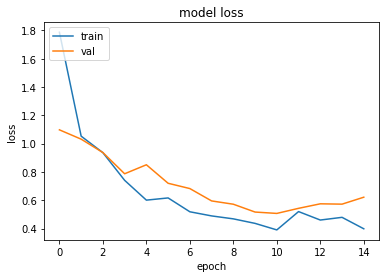

In [61]:
#Evaluation of the model
#Plotting the loss in training and validation
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [62]:
#Check the accuracy
score = model.evaluate(train_dataset)
print('Test score:', score[0])
print('Test accuracy:', score[1])

8/8 [==============================] - 29s 3s/step - loss: 0.3058 - accuracy: 0.8996
Test score: 0.3057951331138611
Test accuracy: 0.8995984196662903


In [63]:
#Import validation data for testing the model
path_dir = '/content/drive/MyDrive/4th Year - 1st Sem/COE 005/Covid19-dataset/'

def loadImages(path, folder):
    data_files = sorted([os.path.join(path, folder, file)
                        for file in os.listdir(path + folder + '/')
                        if (file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png') or file.endswith('.webp'))])
    return data_files

valid_data = loadImages(path_dir, 'validation')

In [64]:
#Convert image data into array
x_cv = valid_data
x_t = []
images = []

for x in x_cv:
    img = cv2.imread(x)
    img = img[:, :, :3]
    images.append(img)

    width = 224
    height = 224
    dim = (width, height)

    resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
    x_t.append(resized)

x_t = np.array(x_t)
x_t = x_t/255

In [65]:
#Predict the diagnosis of the validation data
y_pred = model.predict(x_t)
predict = np.argmax(y_pred, axis=1)
print(predict)

1/1 [==============================] - 1s 753ms/step
[1 1 0 2 2 2 0 0 2 0]


In [66]:
#Convert numerical predictions into their counterpart diagnosis
pic_num = 0
pred_val = []

while pic_num < 10:
  if predict[pic_num] == 0:
    pred_eq = 'C'
    pred_val.append(pred_eq)
    pic_num += 1
  elif predict[pic_num] == 1:
    pred_eq = 'N'
    pred_val.append(pred_eq)
    pic_num += 1
  elif predict[pic_num] == 2:
    pred_eq = 'V'
    pred_val.append(pred_eq)
    pic_num += 1

In [67]:
#Print actual values
pred_val

['N', 'N', 'C', 'V', 'V', 'V', 'C', 'C', 'V', 'C']

In [68]:
#Import the csv file for output
import pandas as pd
output_data_path = '/content/drive/MyDrive/4th Year - 1st Sem/COE 005/Covid19-dataset/output_exercise.csv'
output_data = pd.read_csv(output_data_path)
output2 = output_data.loc[0:9, 'Unnamed: 0']

In [69]:
#Create a new matrix for the output of prediction
df = {'X-Ray Pic': output2}
final_df = pd.DataFrame(df)
final_df.insert(loc=1, column='Diagnosis', value=pred_val)
final_df

,X-Ray Pic,Diagnosis
0,pic1,N
1,pic2,N
2,pic3,C
3,pic4,V
4,pic5,V
5,pic6,V
6,pic7,C
7,pic8,C
8,pic9,V
9,pic10,C


In [70]:
#Create the csv file, and check your folder
import csv
final_df.to_csv('bive_cnn_output.csv')